# Facebook ad campaign analysis

Data Description: 

Data is from unknown company facebook ad campaign.

1. ad_id - is an unique id for each ad
2. xyzcampaignid - is an ad campaign id of xyz company
3. fbcampaignid - is an id associated with how facebook tracks each campaign
4. age - age of person to whom the ad is shown 
5. gender - gender of person to whom the ad is shown 
6. interest - a code specifying that person interest belongs to which category(interests are as mentioned in the person’s Facebook public profile)
7. impression - the number of times the ad was shown
8. clicks - number of clicks on for particular  ad
9. spent - amount paid by company xyz to Facebook, to show that ad
10. total conversion - Total number of people who enquired about the product after seeing the ad
11. Approved conversion: Total number of people who bought the product after seeing the ad

Aim - Analysing Facebook ad campaign to gain insights of sales conversion.



# importing libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #for plotting 
import seaborn as sns 

# loading dataset

In [2]:
df = pd.read_csv(r"C:\Users\aparn\Desktop\big basket\KAG_conversion_data.csv")

# exploring dataset

In [3]:


df.head() #head function by default return top 5 records

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.shape

(1143, 11)

In [5]:
#checking for duplicate

df.duplicated().sum()

0

In [6]:
#cheching for null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
#statistical summary of data

df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


correlation matrix


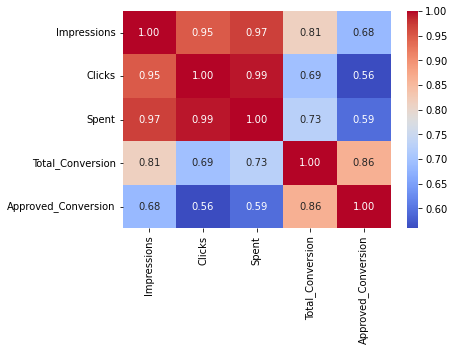

In [8]:
#Correlation Matrix

print('correlation matrix')
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

insight: "Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent".

More no of times ads shown to custormer and more the customer look for product description more the chances that people  buy product.

In [9]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

learn: there are 3 campaigns of xyz company. 

giving name to campaigns - campaign_a, campaign_b and campaign_c for better understanding 


In [10]:
#naming caimpaigns

df["xyz_campaign_id"].replace({916:"campaign_a",936:"campaign_b",
                               1178:"campaign_c"}, inplace=True)

In [11]:
#validating campaigns id renamed or not

df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1


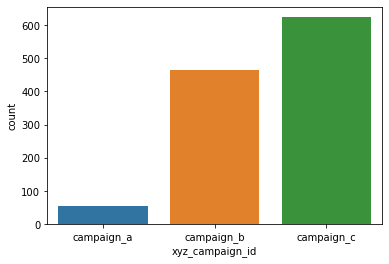

In [12]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 

# Show the plot 
plt.show()

learn: campaign c has more no of ads.

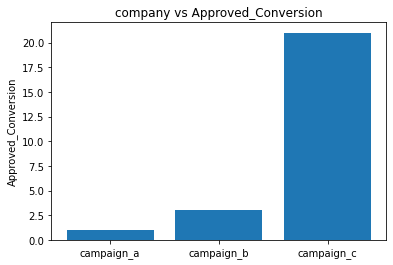

In [13]:
#Approved_Conversion
# Creating our bar plot
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

insight: compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c

#AGE



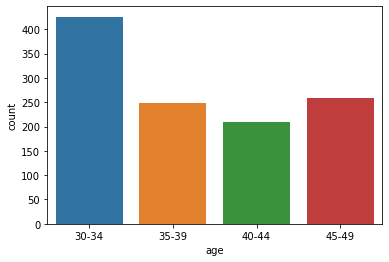

In [14]:
# count plot on single categorical variable 
sns.countplot(x ='age', data = df) 

# Show the plot 
plt.show() 

learn: more number of add shown to 30-34 age group of people

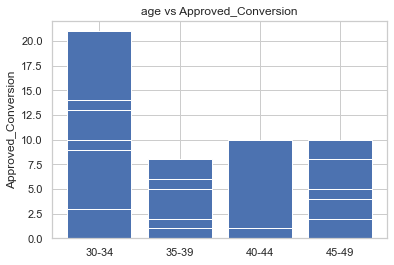

In [36]:
plt.bar(df["age"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("age vs Approved_Conversion")
plt.show()

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

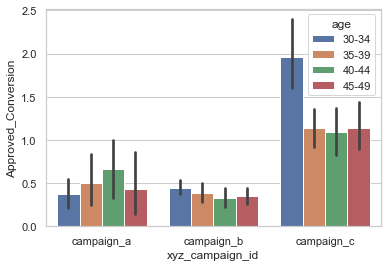

In [15]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

inight: 30-34 age group of people are more interested in campaign_c and campaign_b, whereas 40-44 age group of people are more interest.in campaign_a 

#GENDER

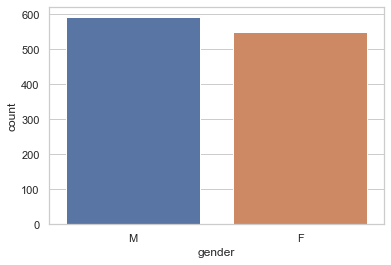

In [16]:
# count plot on single categorical variable 
sns.countplot(x ='gender', data = df) 

# Show the plot 
plt.show() 

learn: there is not much difference in showing ad to males and females.

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

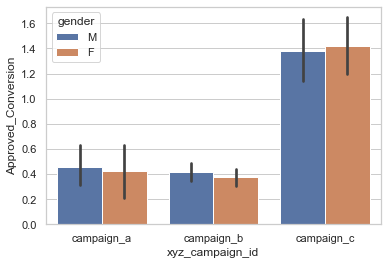

In [17]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=tips)

insight: Both the genders shows similar interests in all three campaigns.

#INTEREST

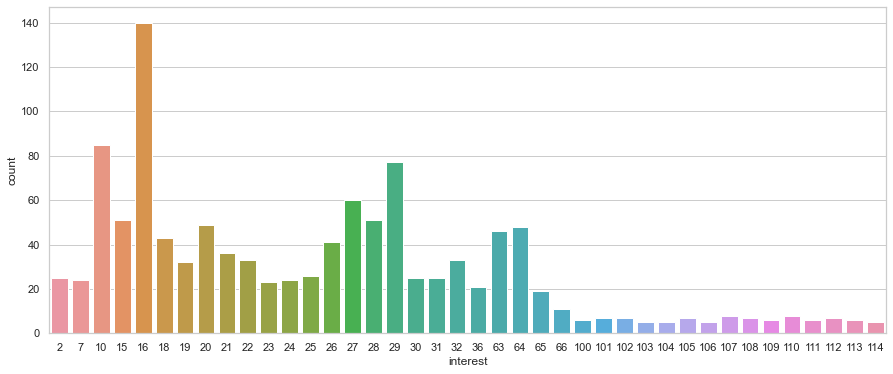

In [18]:
# count plot on single categorical variable 
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='interest', data = df) 

# Show the plot 
plt.show() 

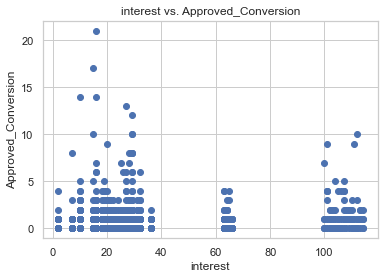

In [19]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

It's interesting to note that, although the count of interest after 100 is less, there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

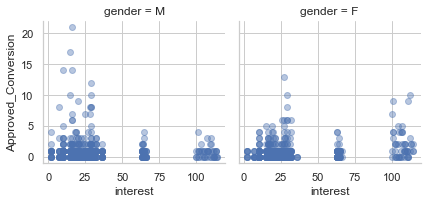

In [20]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

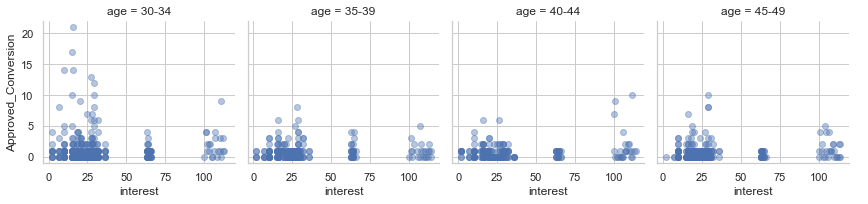

In [21]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();


#SPENT

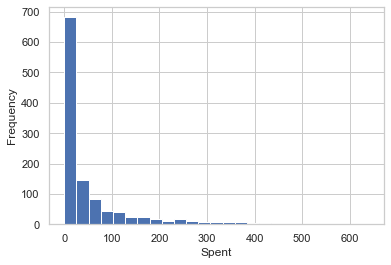

In [22]:
plt.hist(df['Spent'], bins = 25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

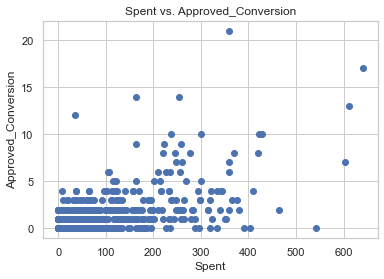

In [23]:
plt.scatter(df["Spent"], df["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

#the amount of money spent increases, no of product bought increases.

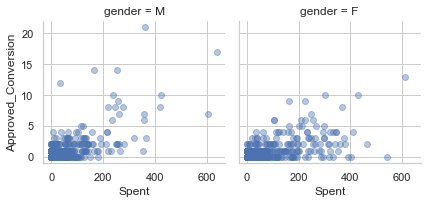

In [24]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

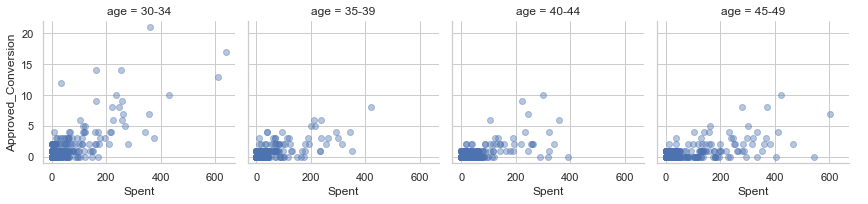

In [25]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

#IMPRESSIONS

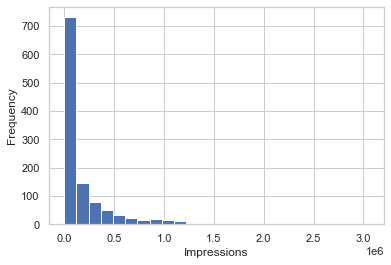

In [26]:
plt.hist(df['Impressions'], bins = 25)
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.show()

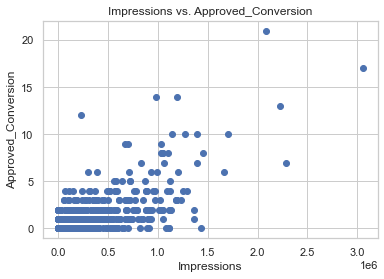

In [27]:
plt.scatter(df["Impressions"], df["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.show()

#INSIGHT: There is a sudden rise in Approved conversions after a certain point in Impressions.

#PEOPLE WHO ACTUALLY BOUGHT THE PRODUCT AFTER CLICKING THE AD? 

Let's see people who actually went from clicking to buying the product.

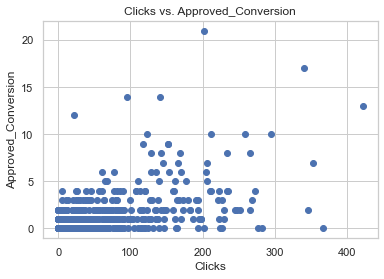

In [28]:
plt.scatter(df["Clicks"], df["Approved_Conversion"])
plt.title("Clicks vs. Approved_Conversion")
plt.xlabel("Clicks")
plt.ylabel("Approved_Conversion")
plt.show()

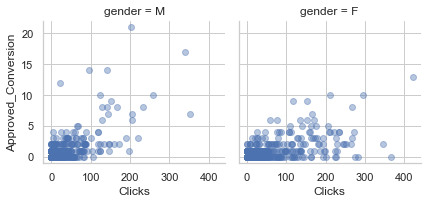

In [29]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

insight: It seems men tend to click more than women but women buy more products than men after clicking the add.

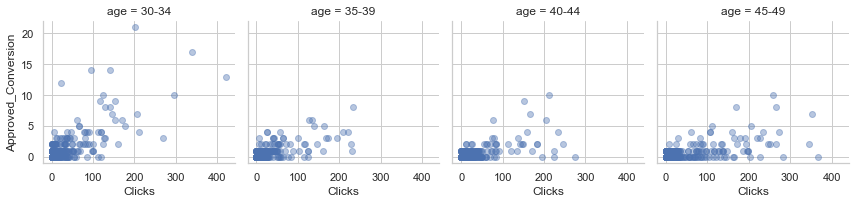

In [30]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

insight: People in age group 30-34 has more tendency to buy product after clicking the add.

#After enquiring the product?

Let's see people who actually went from enquiring to buying the product

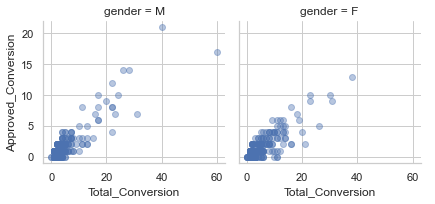

In [31]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

#It seems after enquiring the products women buy more products than men. however men tends to enquire more about products

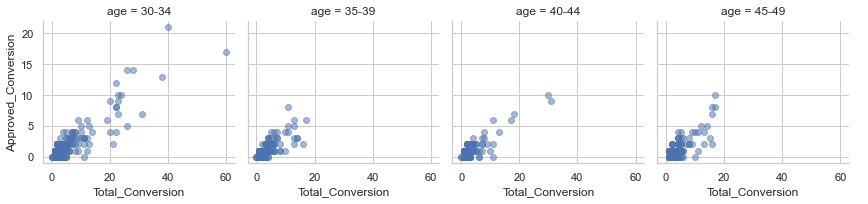

In [32]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend()

#It seems people in age group 30-34 are more likely to buy the product after enquiring the product.

#Zooming into campaign_c 

In [33]:
a=[]
b=[]
c=[]
for i,j,k in zip(df.xyz_campaign_id, df.fb_campaign_id, df.Approved_Conversion):
    if i=="campaign_c":
      a.append(i),b.append(j),c.append(k)

In [34]:
d={'campaign_name':a, 'fb_campaign_id':b, 'Approved_Conversion':c}     
campaign_c=pd.DataFrame(d)
campaign_c.head()

,campaign_name,fb_campaign_id,Approved_Conversion
0,campaign_c,144531,14
1,campaign_c,144531,5
2,campaign_c,144531,1
3,campaign_c,144531,2
4,campaign_c,144531,2


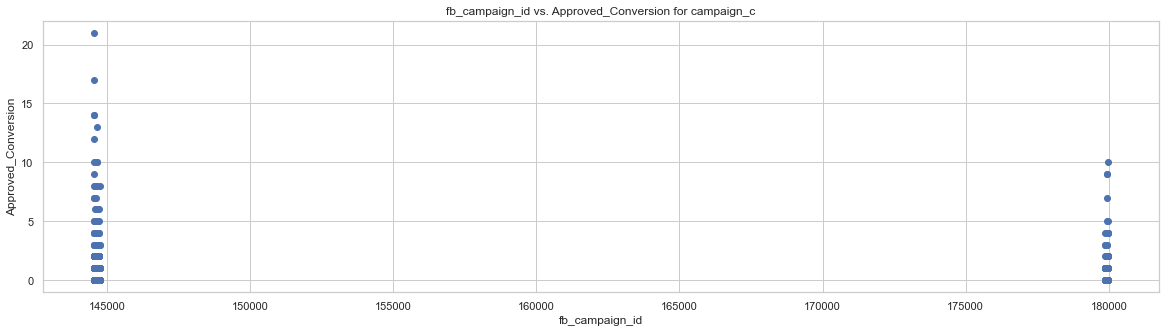

In [35]:
plt.figure(figsize=(20,5))
plt.scatter(campaign_c["fb_campaign_id"], campaign_c["Approved_Conversion"])
plt.title("fb_campaign_id vs. Approved_Conversion for campaign_c")
plt.xlabel("fb_campaign_id")
plt.ylabel("Approved_Conversion")
plt.show()

# SUMMARY

Correlations:
insight: 
1. "Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent". More no of times ads shown to custormer and more the customer look for product description more the chances that people  buy product.

Campaigns:
learn: 
1. there are 3 campaigns of xyz company. 
2. campaign c has more no of ads.

insights:
1. compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c

Age:
learn: 
1. more number of add shown to 30-34 age group of people

insight: 
1. 30-34 age group of people are more interested in campaign_c and campaign_b, whereas 40-44 age group of people are more interest.in campaign_a

Gender:
learn: 
1. there is not much difference in showing ad to males and females.

insight: 
1. Both the genders shows similar interests in all three campaigns.

Interest:
1. It's interesting to note that, although the count of interest after 100 is less, there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

Impression:
1. There is a sudden rise in Approved conversions after a certain point in Impressions.

Clicks:
1. It seems men tend to click more than women but women buy more products than men after clicking the add.
2. People in age group 30-34 has more tendency to buy product after clicking the add.

Product bought after enquiring the ad:
1. It seems women buys more products than men after enquiring the product. However men tends to enquire more about the product.
2. It seems people in age group 30-34 are more likely to buy the product after enquiring the product.

Spent:
1. the amount of money spent increases, no of product bought increases 

Campaign C:
1. For campaign_c, fb_campaign_ids around 145000 have more Approved_Conversion than around 180000

# Business questions

1)How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios)

=> Since highest conversion rate was attained in campaign_c, we can consider the factors contributed in this campaign:

- ads should be more for better reach 
- age group of 30-34 should be main target
- People with interest types after 100 should be given more attention
- impression should be more to achieve more approved_conversion rate. More the number of times the add is shown so that more the people buy the product.
- women 

2)Finding the perfect target demographics with the appropriate clickthrough rates

- Women tend to buy the product more often after clicking the ad than men
- Also the age group 30 to 34 buy the product more often after clicking the ad

3)Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns

- Age group 30-34 tend to take less decision making time followed by 35 to 39 and 40-44.
- Age group 45-49 take the most time to decide.

4)Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.

- clearly campaign_c wins the battle due to highest approved_conversion rate.
- Also campaign_a does pretty well , considering the number of ads it involves. With less no of ads, it has managed to peform better than campaign_b with large no of ads.